# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 3: Regression Modeling and Bacteria Growing

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### Import Libraries

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import warnings

<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS A TWO-WEEK HOMEWORK**. The material is indeed two-weeks-worth of work, so make sure you start it early!!

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).
<hr style="height:2pt">

# TODO: review the plots of the predictions


<div class="theme"> Overview and Data Description</div> 

### Predicting percentage change in multiple bacteria populations given their spreading factor.


In this homework, we will mainly explore polynomial regression for 
predicting a quantitative variable. Specifically, we will build 
regression models that can predict the percentage change in 
bacteria population after 4 hours based on their spreading factor. 
These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population increases this indicates 
that the size of the bacteria population is growing. 
One important factor to note is that the percentage change could be negative. 
This indicates that within the specified time frame, 
the population of the bacteria decreases from the original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file contains the spreading factor of bacteria populations and the second column gives information about the change in percentage of the population. 



 ### Problem Description
Given the bacteria data, we will predict the percentage change in population, giving the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will fit a polynomial regression model for a specified degree that computes the respective degree predictors to fit a model on the training set, which will be evaluated on the test set. The performance of the models should be evaluated using their $MSE$.



<div class='exercise'><b> Question 1:   Data Visualization [10 points total]</b>
    
**1.1** [6 pts] Generate a scatter plot of the data points in the `bacteria_train.csv` 
file with the `Spreading factor` on the $X$-axis and the `Percentage change` on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title. 

**1.2** [4 pts] Based on the graph, is there any discernable relationship between 
the spreading factor and percentage change in population?
    
</div>


### Your Answers

<div class='exercise-r'>  
 
**1.1** [6 pts] Generate a scatter plot of the data points in the `bacteria_train.csv`
 file with the `Spreading factor` on the $X$-axis and the `Percentage change` on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title.
 
 </div>

In [3]:
# your code here
df_train = pd.read_csv('bacteria_train.csv')
df_train.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [4]:
X_train = df_train['Spreading_factor'].values
y_train = df_train['Perc_population'].values

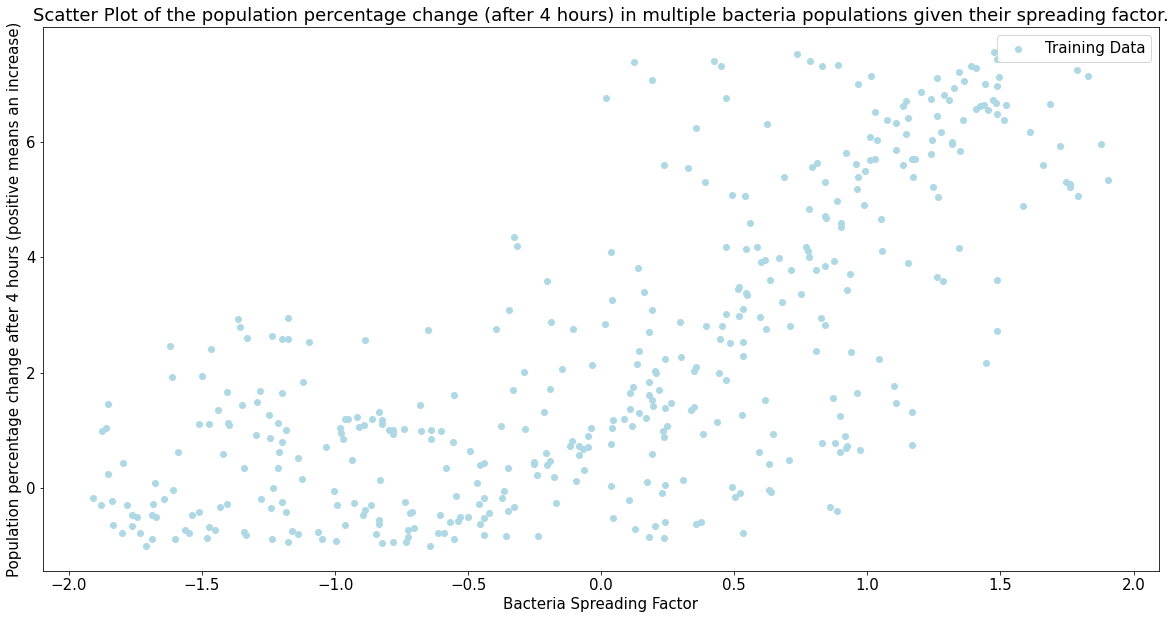

In [5]:
# your code here
plt.figure(figsize = (20, 10))
plt.rcParams['font.size'] = 15
plt.scatter(X_train, y_train, color='lightblue', label='Training Data')
plt.xlabel('Bacteria Spreading Factor')
plt.ylabel('Population percentage change after 4 hours (positive means an increase)')
plt.title('Scatter Plot of the population percentage change (after 4 hours) in multiple bacteria populations given their spreading factor.')
plt.legend()
plt.show()

<div class='exercise-r'>  
 
**1.2** [4 pts] Based on the graph, is there any discernable relationship between
 the spreading factor and percentage change in population?
 
 </div>

Based on the visualisation we made above, I would say that the global trend is: the higher Spreading Factor of a Bacteria is, the higher the population percentage change every 4 hours will be. This makes some sense since intuitively, a Spreading factor is related to the faculty of a bacteria to contaminate people. 

<hr style='height:2px'> 

### Your HW3 Roadmap

We will be following this roadmap for the rest of the homework.

![](soln-roadmap.png)


<div class='exercise'><b> Question 2:   Model Building: Guesstimate the polynomial relationship [10 points total]</b>

**2.1** [5 pts] Examine the relationship between the predictor & response variable, and guesstimate the degree of the polynomial regression that may best fit the data.
- Create a dictionary called `best_mse_dict` to store the best test MSEs for each type of model. The keys of this dictionary will be the question number, and the values will be the MSE values. So, for this question, you will have `best_mse_dict["2,1"] = ...` .
- Fit a polynomial regression on the training set.
- Compute and print the mean_squared_error on the test set.
- Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on the fit.
- Explain your guesstimation of the degree.

**2.2** [5 pts] Compute the confidence intervals for the coefficients. For the model fit above plot the 95% confidence interval of the beta values obtained in the regression model above.
- Display the coefficient values of the model fit above.
- For each bootstrap store the coefficients of the model as a list
- Using the bootstrap list compute the 2.5 and 97.5 confidence points.
- Plot the bootstrap data as a histogram of `Value of beta` vs. `Distribution of beta` for each beta value. Each figure should indicate regions of 95% confidence interval. As always, each figure must have appropriate axis labels and title. Use `plt.subplots(...)` to arrange your plots.

**Hints**
- Bootstrap for entire fraction (100%) of the training data.
- Limit the number of bootstraps to 100.
    
    
</div>


### Answers

<div class='exercise-r'>  
 
**2.1** [5 pts] Examine the relationship between the predictor & response variable, and guesstimate the degree of the polynomial regression that may best fit the data.
 - Create a dictionary called `best_mse_dict` to store the best test MSEs for each type of model. The keys of this dictionary will be the question number, and the values will be the MSE values. So, for this question, you will have `best_mse_dict["2,1"] = ...` .
 - Fit a polynomial regression on the training set.
 - Compute and print the mean_squared_error on the test set.
 - Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on the fit.
 - Explain your guesstimation of the degree.
 
 </div>

In [6]:
# Make a global dictionary to save the MSE values
# your code here
best_mse_dict = {}

In [7]:
# read the data 
# your code here 
df_test = pd.read_csv('bacteria_test.csv')
X_test, y_test = df_test['Spreading_factor'].values, df_test['Perc_population'].values

From the scatterplot we made on question 1, I see no clear polynomial dependency between predictor and response. I will go for a degree 3 for the polynomial features since, empirically, it allows a good amount of flexibility in order to fit a large range of datasets while not overfitting that much. 

In [8]:
# Guesstimate degree of the curve
# your code here 
estimated_degree = 3
Polynomial_transformer = PolynomialFeatures(degree=estimated_degree).fit(X_train.reshape(-1, 1))
x_train_q2 = Polynomial_transformer.transform(X_train.reshape(-1, 1))
x_test_q2 = Polynomial_transformer.transform(X_test.reshape(-1, 1))
lr_q2 = LinearRegression(fit_intercept=False).fit(x_train_q2, y_train)
predictions_train_q2 = lr_q2.predict(x_train_q2)

In [9]:
# Compute the mean_squared_error on the test set and name it mse 
# Add it to best_mse_dict
# your code here 
mse_q2 = mean_squared_error(lr_q2.predict(x_test_q2), y_test)
print('The mse for the Guesstimate model is ', mse_q2)
best_mse_dict["2,1"] = mse_q2


The mse for the Guesstimate model is  2.65190565451496


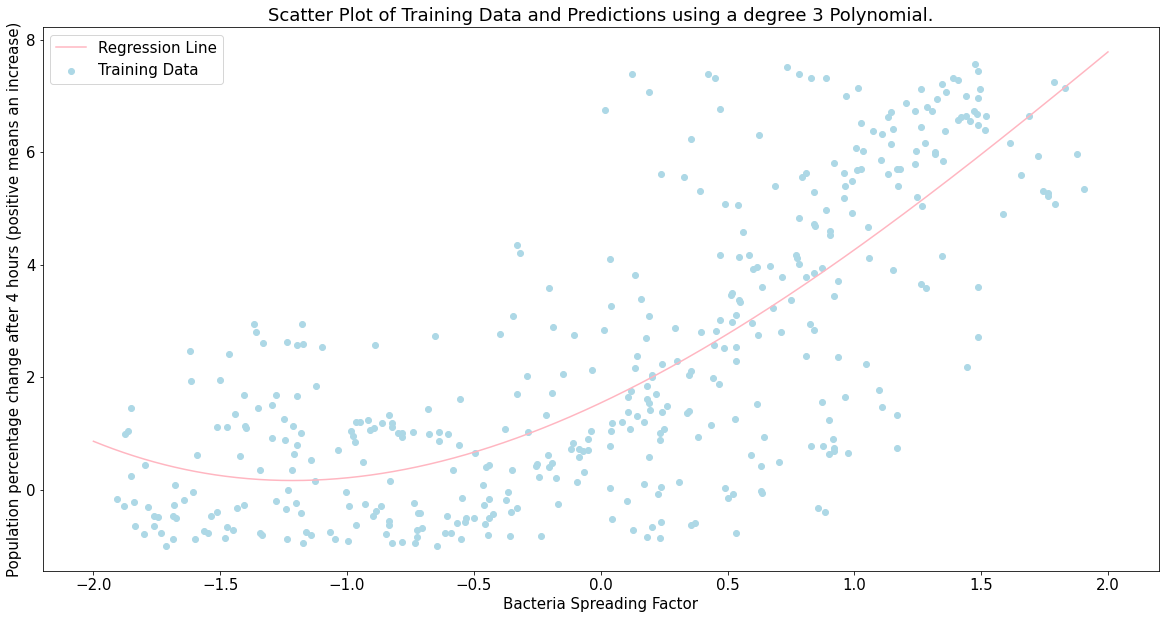

In [10]:
# your code here 
x_plot = np.linspace(-2, 2, 1000)
reg_plot = lr_q2.predict(Polynomial_transformer.transform(x_plot.reshape(-1, 1)))
plt.figure(figsize = (20, 10))
plt.rcParams['font.size'] = 15
plt.scatter(X_train, y_train, color='lightblue', label='Training Data')
plt.plot(x_plot, reg_plot, color='lightpink', label='Regression Line')
plt.xlabel('Bacteria Spreading Factor')
plt.ylabel('Population percentage change after 4 hours (positive means an increase)')
plt.title('Scatter Plot of Training Data and Predictions using a degree 3 Polynomial.')
plt.legend()
plt.show()

In [11]:
pd.DataFrame(lr_q2.coef_, index=['beta_0', 'beta_1', 'beta_2', 'beta_3'])

,0
beta_0,1.544991
beta_1,2.123380
beta_2,0.694222
beta_3,-0.098587


Now, the critics about the guesstimation of the degree are that it quites captures the global trend of the data, and successfully does not capture what appears to be the noise in the training data. $\textbf{However}$, some trend is reflecting the fact this model might not be suited for generalization: the negative coefficient $\beta_3 = -0.09858653$. This means that, as the spreading factor will grow, the estimated values will tend to lower (since for large values, our polynomial is equivalent to its highest degree term). This leads us to believe that there is room for improvement: Feature Selection, regularization of even degree selection might be avenues to prevent such unexpected behavior from happening.

<div class='exercise-r'>  
 
**2.2** [5 pts] Compute the confidence intervals for the coefficients. For the model fit above plot the 95% confidence interval of the beta values obtained in the regression model above.
 - Display the coefficient values of the model fit above.
 - For each bootstrap store the coefficients of the model as a list
 - Using the bootstrap list compute the 2.5 and 97.5 confidence points.
 - Plot the bootstrap data as a histogram of `Value of beta` vs. `Distribution of beta` for each beta value. Each figure should indicate regions of 95% confidence interval. As always, each figure must have appropriate axis labels and title. Use `plt.subplots(...)` to arrange your plots.
 
 **Hints**
 - Bootstrap for entire fraction (100%) of the training data.
 - Limit the number of bootstraps to 100.
 
 
 </div>

In [12]:
pd.DataFrame(lr_q2.coef_, index=['beta_0', 'beta_1', 'beta_2', 'beta_3'])

,0
beta_0,1.544991
beta_1,2.123380
beta_2,0.694222
beta_3,-0.098587


In [13]:
# your code here
coefs_list = [lr_q2.coef_]

In [14]:
# your code here
import itertools # 'more pythonic way to repeat the same operation'
n_bootstrap = 100
for _ in itertools.repeat(None, n_bootstrap):
    df_bootstrapped = df_train.sample(frac=1, replace=True)
    X_train_bootstrapped = df_bootstrapped['Spreading_factor'].values
    y_train_bootstrapped = df_bootstrapped['Perc_population'].values
    estimated_degree = 3
    Polynomial_transformer = PolynomialFeatures(degree=estimated_degree).fit(X_train_bootstrapped.reshape(-1, 1))
    x_train_q2_bootstrapped = Polynomial_transformer.transform(X_train_bootstrapped.reshape(-1, 1))
    lr_q2_bootstrapped = LinearRegression(fit_intercept=False).fit(x_train_q2_bootstrapped, y_train_bootstrapped)
    coefs_list.append(lr_q2_bootstrapped.coef_)
coefs_list = np.asarray(coefs_list)
number_coef = coefs_list.shape[1]

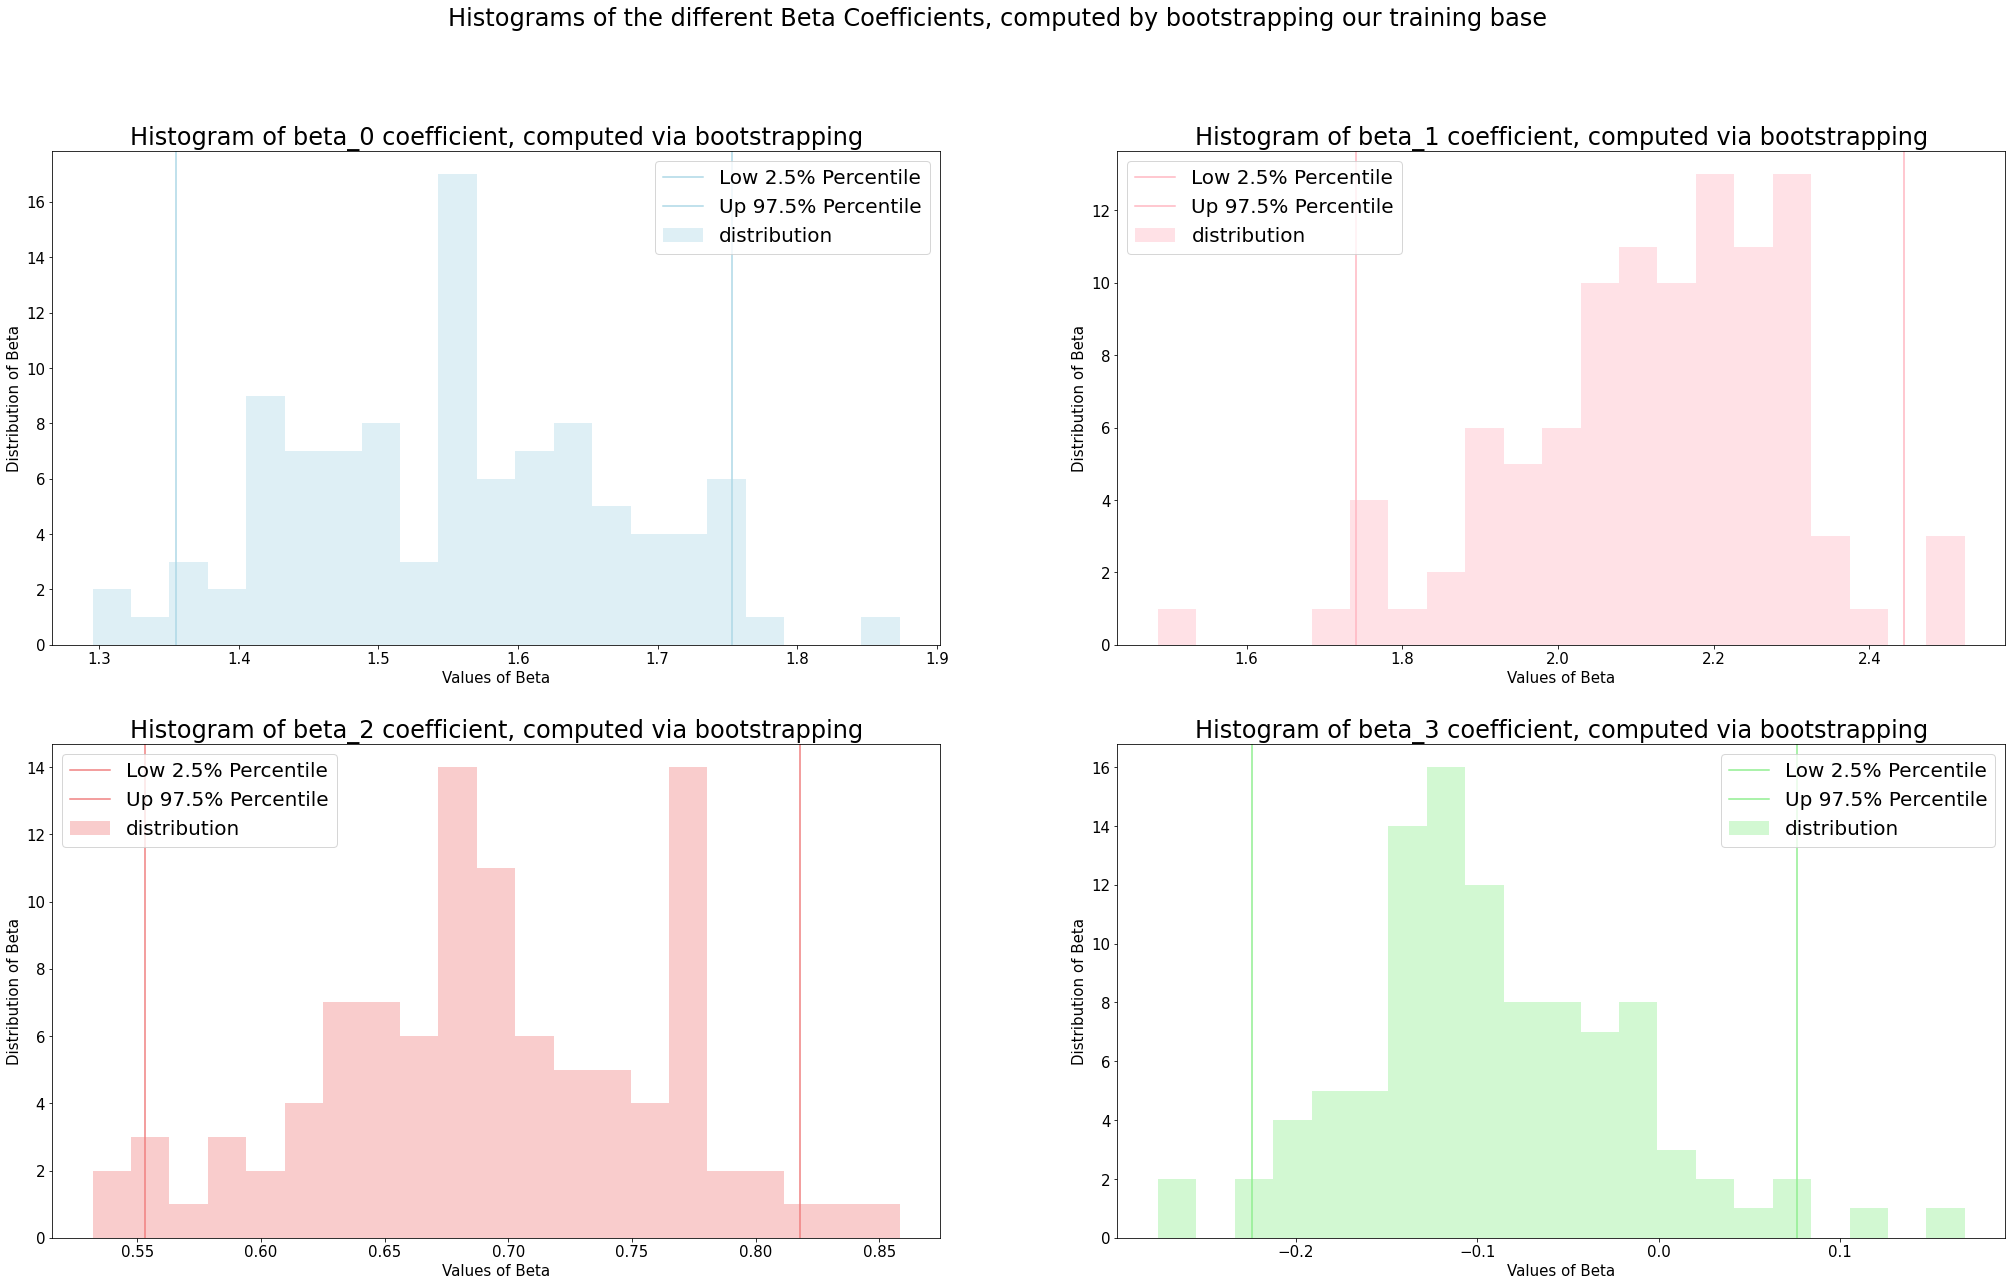

In [15]:
# your code here 
fig, axes = plt.subplots(2, 2, figsize = (35, 20))
plt.rcParams['font.size']=20
fig.suptitle('Histograms of the different Beta Coefficients, computed by bootstrapping our training base')
colors = ['lightblue', 'lightpink', 'lightcoral', 'lightgreen']
for i in range(number_coef):
    percentile_low = np.percentile(coefs_list[:, i], 2.5)
    percentile_up = np.percentile(coefs_list[:, i], 97.5)
    axes[i//2, i%2].hist(coefs_list[:, i], bins = int(1 + 3.322*np.log(len(df_train))), color = colors[i], label='distribution', alpha=0.4)
    axes[i//2, i%2].axvline(percentile_low, color=colors[i], label='Low 2.5% Percentile')
    axes[i//2, i%2].axvline(percentile_up, color=colors[i], label='Up 97.5% Percentile')
    axes[i//2, i%2].set_title('Histogram of beta_'+str(i)+' coefficient, computed via bootstrapping')
    axes[i//2, i%2].set_xlabel('Values of Beta')
    axes[i//2, i%2].set_ylabel('Distribution of Beta')
    axes[i//2, i%2].legend()

<div class='exercise'><b> Question 3:   Use a validation set to find the most promising polynomial relationship [12 points total]</b>

**3.1** [4 pts] Take out a small fraction of the training set for **validation**.
- Compare degrees up to 30
- For each degree of the polynomial
     - Fit a polynomial regression on the training set.
     - Calculate the mean_squared_error ($MSE$) on the *validation set*.
    
- Compare the values of the validation set, and select the degree for which the validation error is the least.

**Hints**
- Manually implement the validation - do not use `sklearn` for this question.

**3.2** [4 pts] Now, with the best selected degree, again train the polynomial regression on the **complete training set** (including the small fraction that you took out to make the validation set). 
Compute and print the $MSE$ on the test set and add it to `best_mse_dict`.


**3.3** [4 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data.

</div>  
                                                                                                                                 

### Your Answers

<div class='exercise-r'>  
 
**3.1** [4 pts] Take out a small fraction of the training set for **validation**.
 - Compare degrees up to 30
 - For each degree of the polynomial
 - Fit a polynomial regression on the training set.
 - Calculate the mean_squared_error ($MSE$) on the *validation set*.
 
 - Compare the values of the validation set, and select the degree for which the validation error is the least.
 
 **Hints**
 - Manually implement the validation - do not use `sklearn` for this question.
 
 </div>

In [16]:
# your code here
degree_max = 30

In [17]:
# split the train data into train and validation sets 
# with 80% of the data as the train data and random_state=44
# your code here
X_train_q3, X_val_q3, y_train_q3, y_val_q3 = train_test_split(df_train['Spreading_factor'].values, df_train['Perc_population'].values, random_state = 44, train_size = 0.8)

In [18]:
# your code here
mses_validation = []
mses_training = []
models = []
for degree_val in range(degree_max+1):
    Polynomial_transformer = PolynomialFeatures(degree=degree_val).fit(X_train_q3.reshape(-1, 1))
    X_train_poly_q3 = Polynomial_transformer.transform(X_train_q3.reshape(-1, 1))
    X_val_poly_q3 = Polynomial_transformer.transform(X_val_q3.reshape(-1, 1))
    lr_val = LinearRegression().fit(X_train_poly_q3, y_train_q3)
    models.append(lr_val)
    validation_predictions = lr_val.predict(X_val_poly_q3)
    training_predictions = lr_val.predict(X_train_poly_q3)
    Training_mse_degree = mean_squared_error(training_predictions, y_train_q3)
    Validation_mse_degree = mean_squared_error(validation_predictions, y_val_q3)
    mses_training.append(Training_mse_degree)
    mses_validation.append(Validation_mse_degree)

In [19]:
# your code here


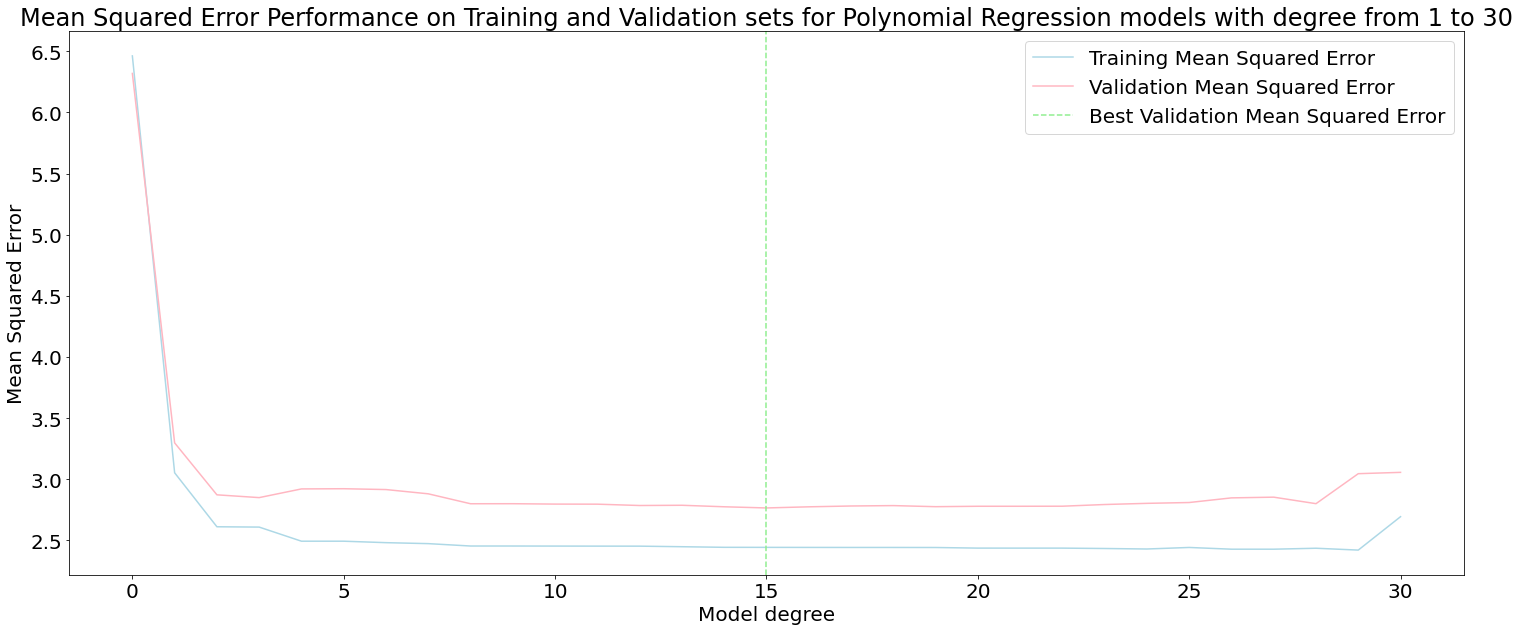

In [20]:
# Print the train and validation MSE along with the degree of the best model. 
# To do this find the degree that gives the lowest MSE.
# your code here 
plt.figure(figsize = (25, 10))
plt.plot(mses_training, label = 'Training Mean Squared Error', color='lightblue')
plt.title('Mean Squared Error Performance on Training and Validation sets for Polynomial Regression models with degree from 1 to 30')
plt.plot(mses_validation, label = 'Validation Mean Squared Error', color='lightpink')
plt.axvline(np.argmin(mses_validation), color='lightgreen', linestyle='--', label='Best Validation Mean Squared Error')
plt.xlabel('Model degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

<div class='exercise-r'>  
 
**3.2** [4 pts] Now, with the best selected degree, again train the polynomial regression on the **complete training set** (including the small fraction that you took out to make the validation set).
 Compute and print the $MSE$ on the test set and add it to `best_mse_dict`.
 
 
 </div>

In [21]:
# your code here
X_train_val_q3, y_train_val_q3 = df_train['Spreading_factor'].values, df_train['Perc_population'].values
Polynomial_transformer = PolynomialFeatures(degree=degree_val).fit(X_train_val_q3.reshape(-1, 1))
X_train_val_poly_q3 = Polynomial_transformer.transform(X_train_val_q3.reshape(-1, 1))
X_test_poly_q3 = Polynomial_transformer.transform(X_test.reshape(-1, 1))
lr_val = LinearRegression().fit(X_train_val_poly_q3, y_train_val_q3)
test_predictions = lr_val.predict(X_test_poly_q3)
Test_mse_q3 = mean_squared_error(test_predictions, y_test)
print('The Test MSE for the degree 15 polynomial trained on the whole training set is ', Test_mse_q3)

The Test MSE for the degree 15 polynomial trained on the whole training set is  2.778576482835215


In [22]:
# your code here
best_mse_dict["3,2"] = Test_mse_q3

<div class='exercise-r'>  
 
**3.3** [4 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data.
 
 
 </div>

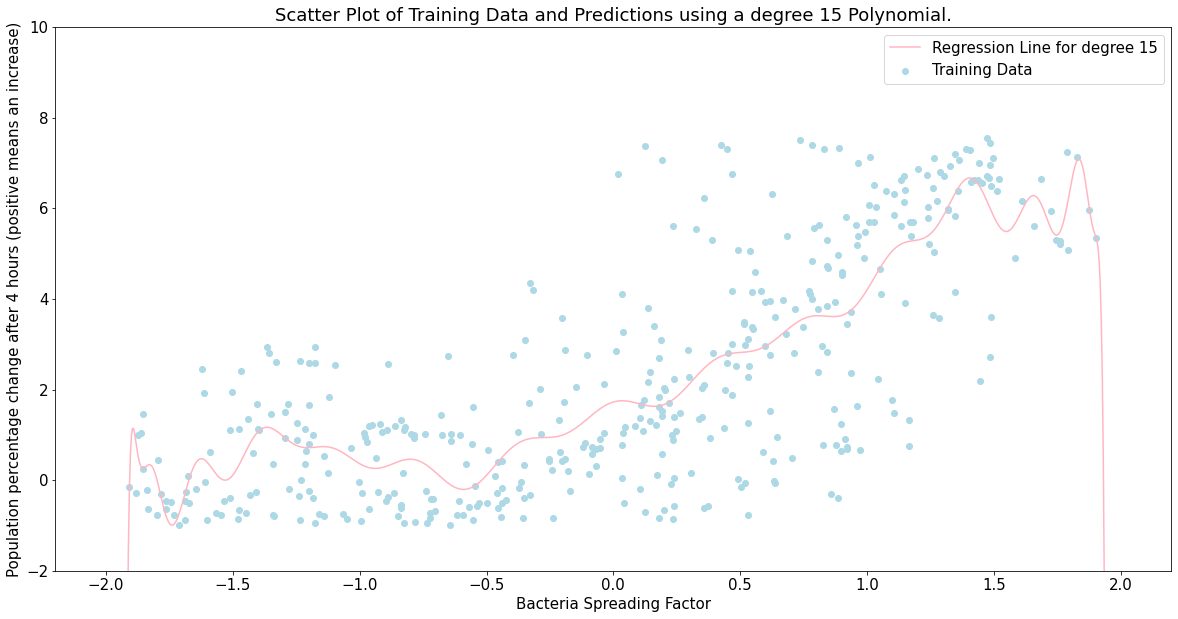

In [23]:
# your code here
x_plot = np.linspace(-2, 2, 1000)
reg_plot = lr_val.predict(Polynomial_transformer.transform(x_plot.reshape(-1, 1)))
plt.figure(figsize = (20, 10))
plt.rcParams['font.size'] = 15
plt.ylim([-2, 10])
plt.scatter(X_train, y_train, color='lightblue', label='Training Data')
plt.plot(x_plot, reg_plot, color='lightpink', label='Regression Line for degree 15')
plt.xlabel('Bacteria Spreading Factor')
plt.ylabel('Population percentage change after 4 hours (positive means an increase)')
plt.title('Scatter Plot of Training Data and Predictions using a degree 15 Polynomial.')
plt.legend()
plt.show()

From what we see above, we can clearly assume that our 15 degree Polynomial is overfitting our dataset. Indeed, it has very poor generalization properties seeing how it behaves for x $\approx$ 2, -2. Therefore, we need to revise the way we select our model, or change our inference method (the way we estimate the parameters from the data). Also, we can see that our model has a high variance in the sense that it tries to capture every single different data point.

<div class='exercise'><b> Question 4:   Finding the best model by k-fold cross-validation [15 points total]</b>

**4.1** [5 pts] In this part we find the best degree of the polynomial regression by running the model on a range of degree values and using k-fold cross validation. Use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.

**Instructions**
- Read the train and test csv files.
- Assign the predictor and response variables appropriately
- Compute polynomial features up to degree 30. 
- For each degree in this range perform the following:
    - Compute the polynomial features for the data.
    - Perform k-fold cross validation with k=10
    - Compute the polynomial features for the data.
    - Compute the $MSE$ of the train and validation data and store in separate lists. 
- Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest validation MSE.


#### Hints
* Use sklearn `cross_validate()` to perform cross validation.

**4.2** [5 pts] Fitting the best model on the test data and compute and print the $MSE$ on the test set.

**Instructions**
- For the best degree computed above, compute the polynomial features for the data in the test csv file.
- Train on the entire data from the train csv file and predict on the test data.
- Report the $MSE$ for the fitted models on both the training and test sets. Save the **test** MSE in `best_mse_dict`.
- Print the coefficients of the model.

**Hints**
* Sort the $x$ values before making your plots.

**4.3** [5 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated.
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**4.1** [5 pts] In this part we find the best degree of the polynomial regression by running the model on a range of degree values and using k-fold cross validation. Use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
 
 **Instructions**
 - Read the train and test csv files.
 - Assign the predictor and response variables appropriately
 - Compute polynomial features up to degree 30.
 - For each degree in this range perform the following:
 - Compute the polynomial features for the data.
 - Perform k-fold cross validation with k=10
 - Compute the polynomial features for the data.
 - Compute the $MSE$ of the train and validation data and store in separate lists.
 - Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest validation MSE.
 
 
 #### Hints
 * Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [24]:
# your code here
X_train_q4, y_train_q4 = df_train['Spreading_factor'].values, df_train['Perc_population'].values
X_test_q4, y_test_q4 = df_test['Spreading_factor'].values, df_test['Perc_population'].values

In [25]:
# your code here
training_mse_cv = []
validation_mse_cv = []
for degree_cv in range(degree_max+1):
    Polynomial_transformer = PolynomialFeatures(degree=degree_cv).fit(X_train_q4.reshape(-1, 1))
    X_train_poly_q4 = Polynomial_transformer.transform(X_train_q4.reshape(-1, 1))
    Model_cv = cross_validate(LinearRegression(), X_train_poly_q4, y_train_q4, cv=10, return_train_score=True, scoring = 'neg_mean_squared_error')
    mean_training_score = np.mean(Model_cv['train_score'])
    training_mse_cv.append(mean_training_score)
    mean_validation_score = np.mean(Model_cv['test_score'])
    validation_mse_cv.append(mean_validation_score)

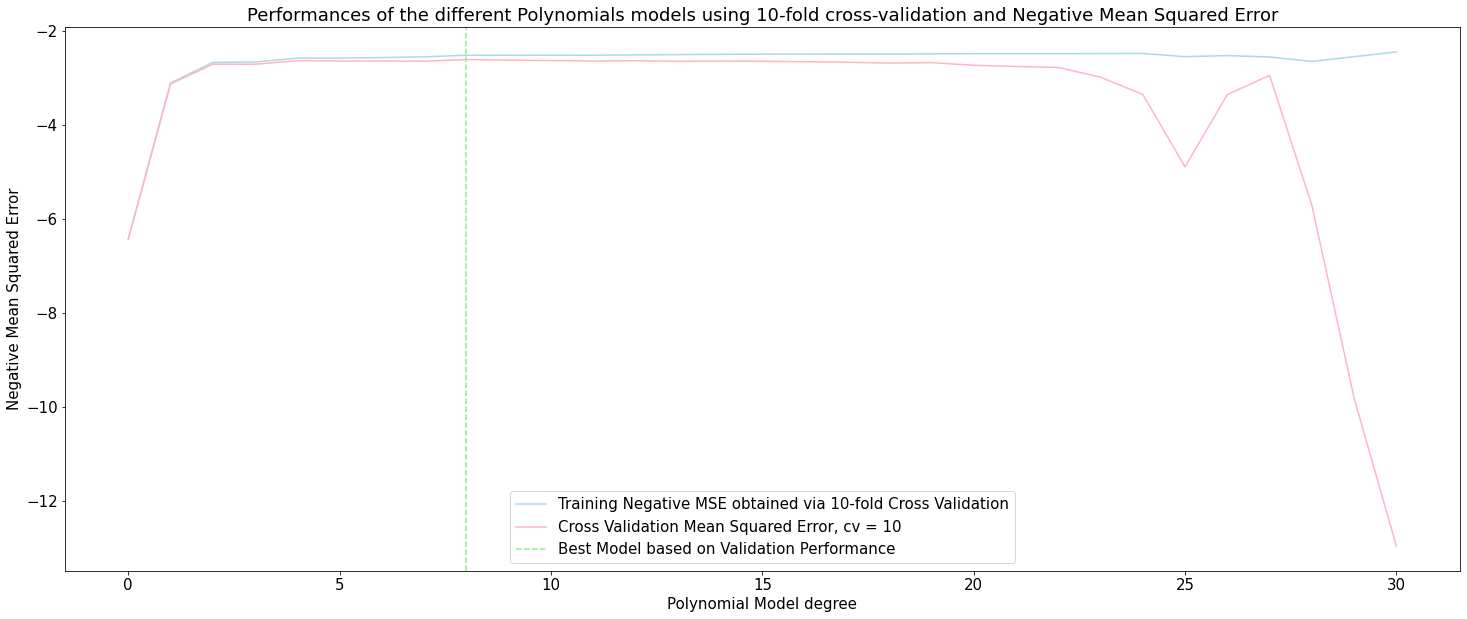

In [26]:
# your code here
plt.figure(figsize = (25, 10))
plt.title('Performances of the different Polynomials models using 10-fold cross-validation and Negative Mean Squared Error')
plt.plot(training_mse_cv, label='Training Negative MSE obtained via 10-fold Cross Validation', color = 'lightblue')
plt.plot(validation_mse_cv, label='Cross Validation Mean Squared Error, cv = 10', color='lightpink')
plt.axvline(np.argmax(validation_mse_cv), color='lightgreen', linestyle='--', label='Best Model based on Validation Performance')
plt.xlabel('Polynomial Model degree')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.show()

In [27]:
# your code here
print('Based on 10-fold Cross Validation performance, the best model is the one with degree '+str(np.argmax(validation_mse_cv))+' with a Cross Fold validation MSE of '+str(np.abs(np.max(validation_mse_cv))) + ' a training MSE of '+str(np.abs(training_mse_cv[np.argmax(validation_mse_cv)])))

Based on 10-fold Cross Validation performance, the best model is the one with degree 8 with a Cross Fold validation MSE of 2.599075351199862 a training MSE of 2.5081491803463067


In [28]:
# Find the best value of d, which gives the least error on the test data
# best_d = min(mse_error, key=mse_error.get)
# your code here

In [29]:
# your code here
best_degree_q4 = 8

<div class='exercise-r'>  
 
**4.2** [5 pts] Fitting the best model on the test data and compute and print the $MSE$ on the test set.
 
 **Instructions**
 - For the best degree computed above, compute the polynomial features for the data in the test csv file.
 - Train on the entire data from the train csv file and predict on the test data.
 - Report the $MSE$ for the fitted models on both the training and test sets. Save the **test** MSE in `best_mse_dict`.
 - Print the coefficients of the model.
 
 **Hints**
 * Sort the $x$ values before making your plots.
 
 </div>

In [30]:
#Compute the polynomial features
# your code here
Polynomial_transformer = PolynomialFeatures(degree=best_degree_q4).fit(X_train_q4.reshape(-1, 1))
X_train_poly_q4 = Polynomial_transformer.transform(X_train_q4.reshape(-1, 1))
X_test_poly_q4 = Polynomial_transformer.transform(X_test_q4.reshape(-1, 1))
best_model_q4 = LinearRegression().fit(X_train_poly_q4, y_train)
training_predictions_q4 = best_model_q4.predict(X_train_poly_q4)
best_training_mse_q4 = mean_squared_error(training_predictions_q4, y_train_q4)
testing_predictions_q4 = best_model_q4.predict(X_test_poly_q4)
best_testing_mse_q4 = mean_squared_error(testing_predictions_q4, y_test_q4)

In [31]:
# your code here
print('Based on 10-fold Cross Validation performance, the best model has a Test MSE of '+str(best_testing_mse_q4))
best_mse_dict["4,2"] = best_testing_mse_q4

Based on 10-fold Cross Validation performance, the best model has a Test MSE of 2.6130106373530135


In [32]:
# your code here
coefs = best_model_q4.coef_
coefs[0] = best_model_q4.intercept_
pd.DataFrame(best_model_q4.coef_, index=['beta_'+str(degree) for degree in range(best_degree_q4+1)])

,0
beta_0,1.535334
beta_1,2.597028
beta_2,-1.094868
beta_3,-1.189134
beta_4,3.483149
beta_5,0.652877
beta_6,-1.713008
beta_7,-0.115305
beta_8,0.240418


<div class='exercise-r'>  
 
**4.3** [5 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated.
 
 </div>

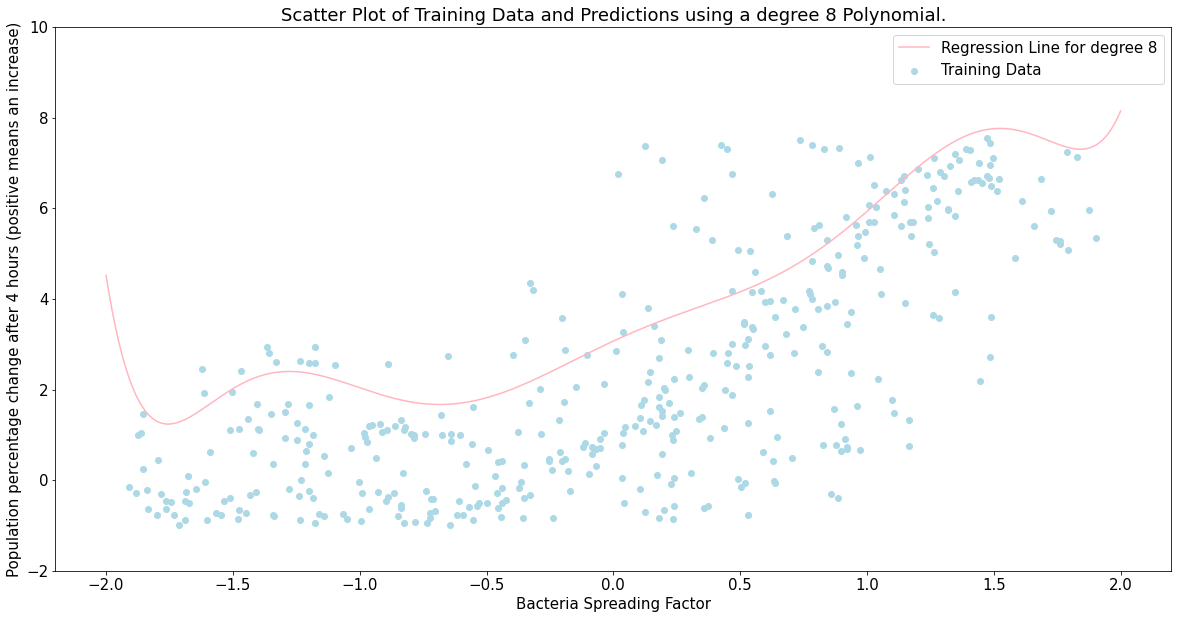

In [33]:
# your code here
x_plot = np.linspace(-2, 2, 1000)
reg_plot = best_model_q4.predict(Polynomial_transformer.transform(x_plot.reshape(-1, 1)))
plt.figure(figsize = (20, 10))
plt.rcParams['font.size'] = 15
plt.ylim([-2, 10])
plt.scatter(X_train, y_train, color='lightblue', label='Training Data')
plt.plot(x_plot, reg_plot, color='lightpink', label='Regression Line for degree 8')
plt.xlabel('Bacteria Spreading Factor')
plt.ylabel('Population percentage change after 4 hours (positive means an increase)')
plt.title('Scatter Plot of Training Data and Predictions using a degree 8 Polynomial.')
plt.legend()
plt.show()

From what we can see on the plot, our model fits relatively weel the data. It is more complex than the model from question 2 (with guesstimate degree = 3) and is less complex than the degree 15 of question 3. Therefore, it achieves a better bias-variance tradeoff than the two previous ones and we can assume that it will have better generalization properties. 

<div class='exercise'><b> Question 5:   Finding the most <b>consistent</b> model; use k-fold cross validation along with bootstraps [13 points total]</b>

**5.1** [5 pts] In the previous part, we used k-fold cross-validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps earlier to estimate the confidence interval of our $\beta_i$ values. In this segment, we will use *bootstrapping* to test the robustness of our estimation. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.

**Instructions**
- Read the train and test csv files.
- Assign the predictor and response variables appropriately
- Select the max degree for computing the polynomial features and number of bootstraps.
- Create bootstraps of the data. For each bootstrap perform the following:
    - For each degree in the range of max degree perform the following:
        - Compute the polynomial features for the data.
        - Perform k-fold cross validation with k=10
        - Compute the polynomial features for the data.
        - Compute the $MSE$ of the train and validation data and store in separate lists. 
    - Select the degree for which the mean of the k-fold **validation** $MSE$ is the least.
    - Store the best degree in a list
- Plot a histogram with `Degree of polynomial` on the $x$-axis and `Number of degrees voted best` on the $y$-axis, from the above steps.
- The degree voted best the most times can be selected as the best degree
- Retrain on the entire test set and report the $MSE$ on the test set.

**Hints**
- Limit the maximum degree to 50.
- Limit the number of bootstraps to 100.
- Use sklearn `cross_validate()` to perform cross validation.

**5.2** [3 pts] What are your observations? 

- Why do you see so much variance in the `best_degree` over the bootstraps?
- What will you choose as your `best_degree` for the test set? 

**5.3** [5 pts] Fitting the best model on the test data.

**Instructions**
- For the best degree computed above, compute the polynomial features for the data in the test csv file.
- Train on the entire data from the train csv file and predict on the test data.
- Print the MSE of the model on the test data, and save it in `best_mse_dict`
- Make a scatter plot of `Spread factor` vs. `Percentage change in population` for your best degree. The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve as well, and comment on how it fits the data, as well as how it compares to prior model fits.
- Print the coefficients of the model
    
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**5.1** [5 pts] In the previous part, we used k-fold cross-validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps earlier to estimate the confidence interval of our $\beta_i$ values. In this segment, we will use *bootstrapping* to test the robustness of our estimation. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
 
 **Instructions**
 - Read the train and test csv files.
 - Assign the predictor and response variables appropriately
 - Select the max degree for computing the polynomial features and number of bootstraps.
 - Create bootstraps of the data. For each bootstrap perform the following:
 - For each degree in the range of max degree perform the following:
 - Compute the polynomial features for the data.
 - Perform k-fold cross validation with k=10
 - Compute the polynomial features for the data.
 - Compute the $MSE$ of the train and validation data and store in separate lists.
 - Select the degree for which the mean of the k-fold **validation** $MSE$ is the least.
 - Store the best degree in a list
 - Plot a histogram with `Degree of polynomial` on the $x$-axis and `Number of degrees voted best` on the $y$-axis, from the above steps.
 - The degree voted best the most times can be selected as the best degree
 - Retrain on the entire test set and report the $MSE$ on the test set.
 
 **Hints**
 - Limit the maximum degree to 50.
 - Limit the number of bootstraps to 100.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [34]:
# your code here
n_bootstrap = 100
max_degree_q5 = 50
df_train = pd.read_csv('bacteria_train.csv')
df_test = pd.read_csv('bacteria_test.csv')
best_degrees_bootstrap = []
for _ in itertools.repeat(None, n_bootstrap):
    df_bootstrapped = df_train.sample(frac=1, replace=True)
    X_train_q5_bootstrapped, y_train_q5_bootstrapped = df_bootstrapped['Spreading_factor'].values, df_bootstrapped['Perc_population'].values
    training_mses_q5 = []
    validation_mses_q5 = []
    for degree_bootstrapped in range(max_degree_q5+1):
        PolyTransformer_q5 = PolynomialFeatures(degree=degree_bootstrapped).fit(X_train_q5_bootstrapped.reshape(-1, 1))
        X_poly_train_bootstrapped_q5 = PolyTransformer_q5.transform(X_train_q5_bootstrapped.reshape(-1, 1))
        cv_model_bootstrapped = cross_validate(LinearRegression(fit_intercept=True), X_poly_train_bootstrapped_q5, y_train_q5_bootstrapped, cv=10, return_train_score=True, scoring = 'neg_mean_squared_error')
        training_mses_q5.append(np.mean(cv_model_bootstrapped['train_score']))
        validation_mses_q5.append(np.mean(cv_model_bootstrapped['test_score']))
    best_degrees_bootstrap.append(np.argmax(validation_mses_q5))

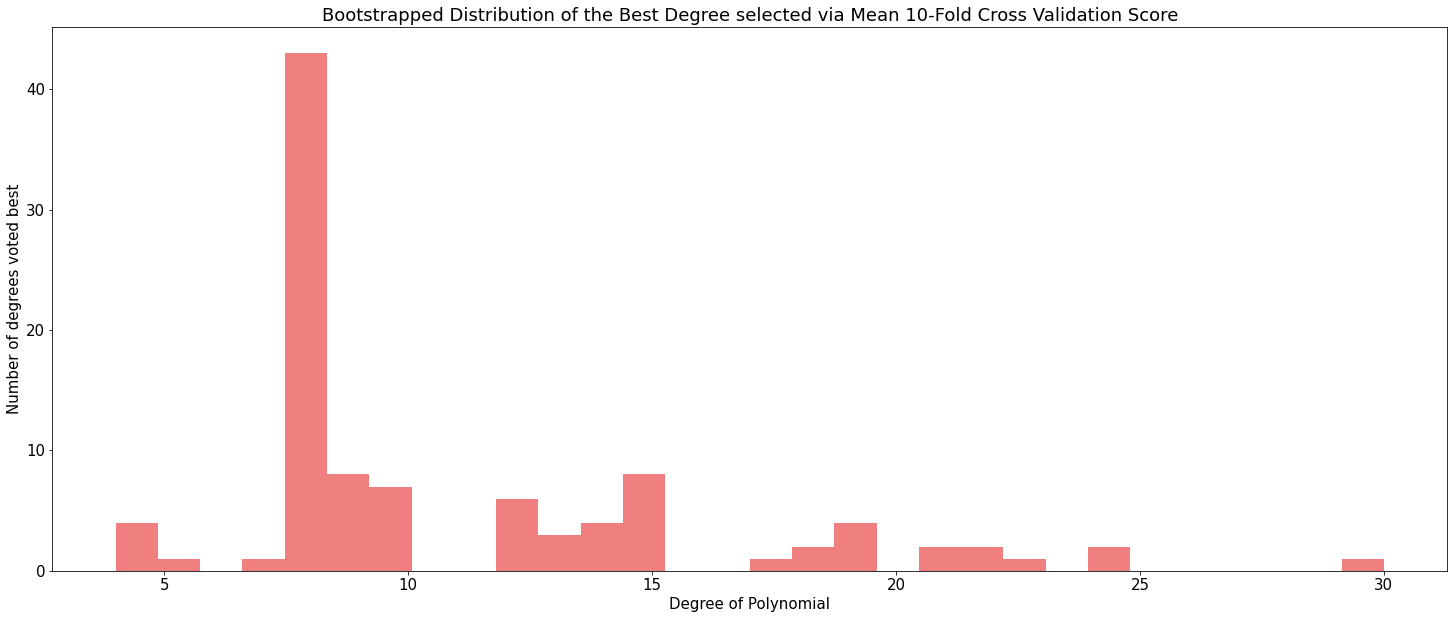

In [35]:
# your code here
plt.figure(figsize = (25, 10))
plt.title('Bootstrapped Distribution of the Best Degree selected via Mean 10-Fold Cross Validation Score')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Number of degrees voted best')
plt.hist(best_degrees_bootstrap, color='lightcoral', bins=30)
plt.show()

In [36]:
# your code here
best_degree_q5 = (pd.Series(best_degrees_bootstrap).value_counts()).index[0]
X_train_q5, y_train_q5 = df_train['Spreading_factor'].values, df_train['Perc_population'].values
X_test_q5, y_test_q5 = df_test['Spreading_factor'].values, df_test['Perc_population'].values
PolyTransformer_q5 = PolynomialFeatures(degree=best_degree_q5).fit(X_train_q5.reshape(-1, 1))
X_poly_train_q5 = PolyTransformer_q5.transform(X_train_q5.reshape(-1, 1))
X_poly_test_q5 = PolyTransformer_q5.transform(X_test_q5.reshape(-1, 1))
model_best_q5 = LinearRegression(fit_intercept=True).fit(X_poly_train_q5, y_train_q5)
test_predictions = model_best_q5.predict(X_poly_test_q5)
test_mse_q5 = mean_squared_error(y_test_q5, test_predictions)
print('Based on the previous procedure, the best degree selected is '+str(best_degree_q5) + ' and has a Test MSE of '+str(test_mse_q5))

Based on the previous procedure, the best degree selected is 8 and has a Test MSE of 2.6130106373530135


<div class='exercise-r'>  
 
**5.2** [3 pts] What are your observations?
 
 - Why do you see so much variance in the `best_degree` over the bootstraps?
 - What will you choose as your `best_degree` for the test set?
 
 </div>

- I see so much variance in the degree selected over the bootstraps because in Linear Regression, the parameter estimation is heavily dependent on the data and outliers. This explains why bootstrapping our data gives us such different results. There is also another explanation: when bootstrapping, we repeat the same rows maybe several times, thus violating the independency assumption for the different observations. This may result in even higher variance when estimating the coefficients.
- For the test set, I would select the best model according to the different cross validation results: the model with degree 8 (although it is quite a complex model for such 1D data and we may be risking potential undersired generalization behavior). 

<div class='exercise-r'>  
 
**5.3** [5 pts] Fitting the best model on the test data.
 
 **Instructions**
 - For the best degree computed above, compute the polynomial features for the data in the test csv file.
 - Train on the entire data from the train csv file and predict on the test data.
 - Print the MSE of the model on the test data, and save it in `best_mse_dict`
 - Make a scatter plot of `Spread factor` vs. `Percentage change in population` for your best degree. The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve as well, and comment on how it fits the data, as well as how it compares to prior model fits.
 - Print the coefficients of the model
 
 
 </div>

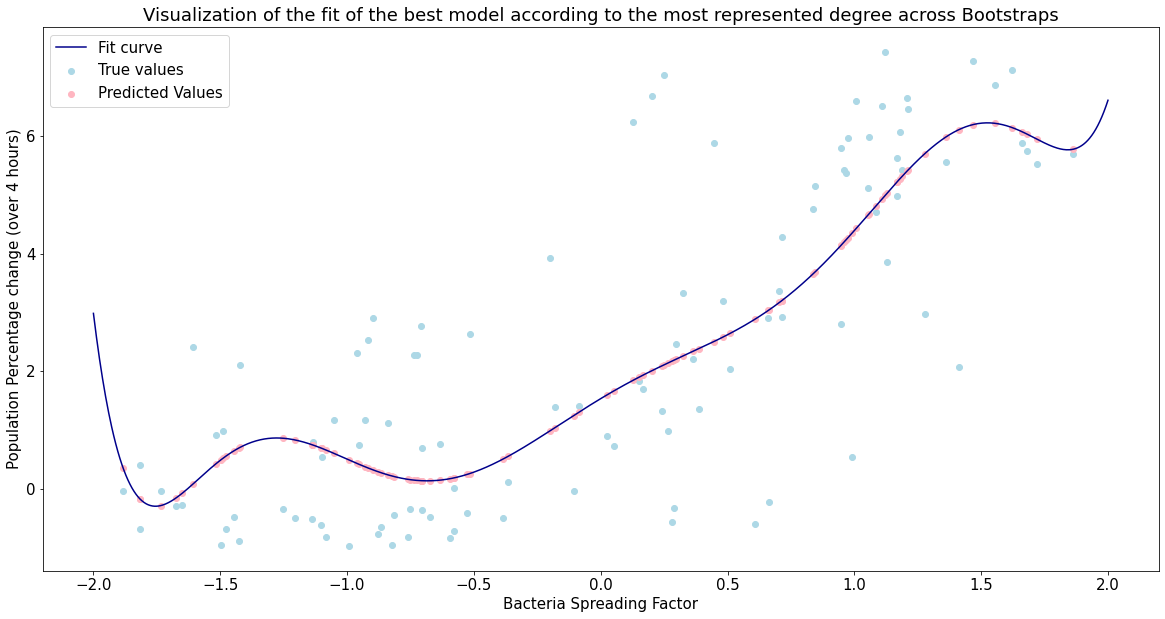

In [37]:
# your code here
plt.figure(figsize = (20, 10))
plt.title('Visualization of the fit of the best model according to the most represented degree across Bootstraps')
plt.xlabel('Bacteria Spreading Factor')
plt.ylabel('Population Percentage change (over 4 hours)')
plt.scatter(X_test_q5, y_test_q5, color='lightblue', label='True values')
plt.scatter(X_test_q5, test_predictions, color='lightpink', label = 'Predicted Values')
x_plot = np.linspace(-2, 2, 1000)
reg_plot = model_best_q5.predict(PolyTransformer_q5.transform(x_plot.reshape(-1, 1)))
plt.plot(x_plot, reg_plot, label = 'Fit curve', color='darkblue')
plt.legend()
plt.show()

In [38]:
# Select the best degree from the above exercise
# your code here


In [39]:
#Compute the polynomial features
# your code here


In [40]:
# your code here


In [41]:
# your code here
best_mse_dict["5,3"] = test_mse_q5
print('Based on the previous procedure, the best degree selected is '+str(best_degree_q5) + ' and has a Test MSE of '+str(test_mse_q5))

Based on the previous procedure, the best degree selected is 8 and has a Test MSE of 2.6130106373530135


In [42]:
# your code here
coefs = model_best_q5.coef_
coefs[0] = model_best_q5.intercept_
pd.DataFrame(model_best_q5.coef_, index=['beta_'+str(degree) for degree in range(best_degree_q5+1)])

,0
beta_0,1.535334
beta_1,2.597028
beta_2,-1.094868
beta_3,-1.189134
beta_4,3.483149
beta_5,0.652877
beta_6,-1.713008
beta_7,-0.115305
beta_8,0.240418


The difference between the regression fit and the prior ones is that we can infer that this regression line has better model generalizability properties: there is no unexpected behavior at the limits. 

<div class='exercise'><b> Question 6:   Improving model consistency [30 points total]</b>

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to* **degree `n`** using `Polynomial_features`. In this section $n=30$, and our **best model** can be chosen from any possible combination of the **30** degrees chosen.

For eg. a model with degrees `1,2,4,6`

The total number of such possible models is $2^{30}\approx10^9$ and searching through all of them would be laborious and computationally inefficient. Instead, we can use $Lasso$ Regularization which *switches off* highly unstable degree coefficients and gives us the most efficient solution.

**6.1** [10 pts] Find the best hyper-parameter `alpha`

First, we will use `cross_validation` to find the the best regularization parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.

**NOTE**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$

#### Instructions
- Read the train csv file.
- Assign the predictor and response variables appropriately
- Select the max degree of the polynomial, and make a list of `alpha` values
- For each value of `alpha`:
    - Compute the polynomial features for the data.
    - Create a `Lasso` regularization model with the value of `alpha`
    - Perform k-fold cross validation with k=10 using `Lasso` as model.
    - Compute and print the $MSE$ of the train and validation data and store in separate lists. 
- Select the `alpha` for which the mean of the k-fold $MSE$ is the least.
- Store the previously selected values as `best_alpha` & print it.


#### Hints
- Limit the maximum degree to 30.
- Take at least three different values of alpha.
- Use sklearn `cross_validate()` to perform cross validation.

**6.2** [10 pts] Find the most significant degrees.

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:

For each bootstrap of the data, you will get some degrees that are **significant** $(\mid\beta_i\mid \gt 0.1)$. You would like to see which degree coefficients are significant over several such iterations.

As before, we use the `bacteria_train.csv` for cross validation.

NOTE: You are free to experiment with the number of bootstraps.

**Instructions**
- Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap
- For each bootstrap:
    - Take a sample the dataframe with `frac=1`
    - Train a **Lasso** model with the `best_alpha` computed above.
    - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $)
    - For each significant degree, update the count of that degree in `significant_degrees` 
- Plot the count of degrees for each bootstrap as a bar plot.


#### Hints
- Limit the maximum degree to 30.
- Take at least three different values of alpha.
- Use sklearn `cross_validate()` to perform cross validation.

**6.3** [5 pts] Compute and print the MSE on the test set

Now, from the previous plot, you can see that only some degrees are consistently significant over several bootstraps. You will now retrain the *L1* regularized model on the entire **training** data and find the test $MSE$

#### Instructions

- Based on the plot from 6.2, choose the maximum degree of the polynomial you will fit for your final model.
- Retrain the *regularized* ***LASSO*** model with your chosen degree on the entire test set and report the $MSE$ on the test set.
- Find and print the degrees of the polynomial that have cofficients with absolute value greater than 0.1
- Save the test $MSE$ to `best_mse_dict`.

**6.4** [5 pts] What are your observations?

- Compare your `best_degree` from question 5 with your chosen degree in 6.3 above and comment on the difference.
- Which degree coefficients in your best fit model from above are significant? If not all coefficients are significant, why?
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Is your current model more reliable than the models in question 5 and prior? On what basis do you claim its robustness?
    
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**6.1** [10 pts] Find the best hyper-parameter `alpha`
 
 First, we will use `cross_validation` to find the the best regularization parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.
 
 **NOTE**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$
 
 #### Instructions
 - Read the train csv file.
 - Assign the predictor and response variables appropriately
 - Select the max degree of the polynomial, and make a list of `alpha` values
 - For each value of `alpha`:
 - Compute the polynomial features for the data.
 - Create a `Lasso` regularization model with the value of `alpha`
 - Perform k-fold cross validation with k=10 using `Lasso` as model.
 - Compute and print the $MSE$ of the train and validation data and store in separate lists.
 - Select the `alpha` for which the mean of the k-fold $MSE$ is the least.
 - Store the previously selected values as `best_alpha` & print it.
 
 
 #### Hints
 - Limit the maximum degree to 30.
 - Take at least three different values of alpha.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [43]:
# Train data
# your code here
df_train = pd.read_csv('bacteria_train.csv')
X_train_q6, y_train_q6 = df_train['Spreading_factor'].values, df_train['Perc_population'].values
max_degree_q6 = 30
alphas = np.logspace(-3, 3, 7)
PolyTransformer_q6 = PolynomialFeatures(degree=max_degree_q6).fit(X_train_q6.reshape(-1, 1))
X_poly_train_q6 = PolyTransformer_q6.transform(X_train_q6.reshape(-1, 1))
train_mses_q6 = []
test_mses_q6 = []
for alpha in alphas:
    Lasso_cv = cross_validate(Lasso(alpha=alpha, fit_intercept=True, normalize=True), X_poly_train_q6, y_train_q6, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
    train_mses_q6.append(np.mean(Lasso_cv['train_score']))
    test_mses_q6.append(np.mean(Lasso_cv['test_score']))

In [44]:
print(train_mses_q6)
print(test_mses_q6)

[-2.5615200365618866, -2.749469963335076, -6.4202821965141395, -6.4202821965141395, -6.4202821965141395, -6.4202821965141395, -6.4202821965141395]
[-2.615647296654679, -2.7842609191726995, -6.437577187336556, -6.437577187336556, -6.437577187336556, -6.437577187336556, -6.437577187336556]


In [45]:
# Bootstrap first & then find the best regularization coefficient
# your code here
best_alpha = alphas[np.argmax(test_mses_q6)]
print('The best regularization coefficient out of '+str(alphas)+' when performing L1 Regularization for models of degree 30 is ', best_alpha)

The best regularization coefficient out of [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03] when performing L1 Regularization for models of degree 30 is  0.001


<div class='exercise-r'>  
 
**6.2** [10 pts] Find the most significant degrees.
 
 From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:
 
 For each bootstrap of the data, you will get some degrees that are **significant** $(\mid\beta_i\mid \gt 0.1)$. You would like to see which degree coefficients are significant over several such iterations.
 
 As before, we use the `bacteria_train.csv` for cross validation.
 
 NOTE: You are free to experiment with the number of bootstraps.
 
 **Instructions**
 - Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap
 - For each bootstrap:
 - Take a sample the dataframe with `frac=1`
 - Train a **Lasso** model with the `best_alpha` computed above.
 - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $)
 - For each significant degree, update the count of that degree in `significant_degrees`
 - Plot the count of degrees for each bootstrap as a bar plot.
 
 
 #### Hints
 - Limit the maximum degree to 30.
 - Take at least three different values of alpha.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
# your code here
n_bootstrap = 500
max_degree_q6 = 30
coefficients = []
for _ in itertools.repeat(None, n_bootstrap):
    df_train_bootstrap = df_train.sample(frac=1, replace=True)
    X_train_q6, y_train_q6 = df_train_bootstrap['Spreading_factor'].values, df_train_bootstrap['Perc_population'].values
    PolyTransformer_q6 = PolynomialFeatures(degree=max_degree_q6).fit(X_train_q6.reshape(-1, 1))
    X_poly_train_q6 = PolyTransformer_q6.transform(X_train_q6.reshape(-1, 1))
    Lasso_model = Lasso(alpha=best_alpha, fit_intercept=False, normalize=True, max_iter=10000)
    Lasso_model.fit(X_poly_train_q6, y_train_q6)
    coefficients.append(Lasso_model.coef_)

In [48]:
# your code here
coefficients = np.asarray(coefficients)
thresholds = np.ones(31)*0.1
count = np.sum(np.abs(coefficients) > thresholds, axis=0)

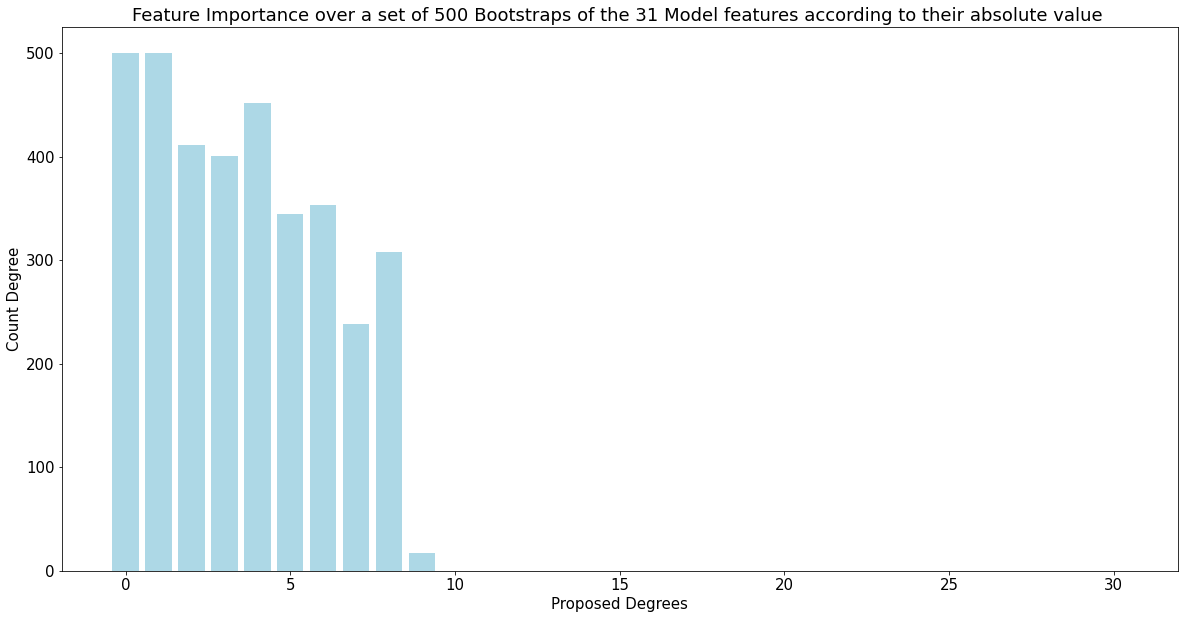

In [49]:
plt.figure(figsize = (20, 10))
plt.bar(x=range(31), height=count, color='lightblue')
plt.title('Feature Importance over a set of 500 Bootstraps of the 31 Model features according to their absolute value ')
plt.ylabel('Count Degree')
plt.xlabel('Proposed Degrees')
plt.show()

<div class='exercise-r'>  
 
**6.3** [5 pts] Compute and print the MSE on the test set
 
 Now, from the previous plot, you can see that only some degrees are consistently significant over several bootstraps. You will now retrain the *L1* regularized model on the entire **training** data and find the test $MSE$
 
 #### Instructions
 
 - Based on the plot from 6.2, choose the maximum degree of the polynomial you will fit for your final model.
 - Retrain the *regularized* ***LASSO*** model with your chosen degree on the entire test set and report the $MSE$ on the test set.
 - Find and print the degrees of the polynomial that have cofficients with absolute value greater than 0.1
 - Save the test $MSE$ to `best_mse_dict`.
 
 </div>

In [50]:
# your code here
df_test = pd.read_csv('bacteria_test.csv')
max_degree_bar_plot = 9
X_train_q6_lasso, y_train_q6_lasso = df_train['Spreading_factor'].values, df_train['Perc_population'].values
X_test_q6_lasso, y_test_q6_lasso = df_test['Spreading_factor'].values, df_test['Perc_population'].values
PolyTransformer_q6_lasso = PolynomialFeatures(degree=max_degree_bar_plot).fit(X_train_q6_lasso.reshape(-1, 1))
X_poly_train_q6_lasso = PolyTransformer_q6_lasso.transform(X_train_q6_lasso.reshape(-1, 1))
X_poly_test_q6_lasso = PolyTransformer_q6_lasso.transform(X_test_q6_lasso.reshape(-1, 1))
Lasso_model = Lasso(alpha=best_alpha, fit_intercept=True, normalize=True)
Lasso_model.fit(X_poly_train_q6_lasso, y_train_q6_lasso)
test_predictions_q6 = Lasso_model.predict(X_poly_test_q6_lasso)

In [51]:
# your code here
mse_lasso_q6 = mean_squared_error(test_predictions_q6, y_test_q6_lasso)
best_mse_dict["6,3"] = mse_lasso_q6
print('With the Selected model from the Count plot and the best regularized alpha, our test mean Squared Error is ', mse_lasso_q6)

With the Selected model from the Count plot and the best regularized alpha, our test mean Squared Error is  2.6031712678714363


In [52]:
# your code here
print('The degrees which have significant coefficient value with the regularization are :',*np.where(np.abs(Lasso_model.coef_)> 0.1)[0])

The degrees which have significant coefficient value with the regularization are : 1 2


<div class='exercise-r'>  
 
**6.4** [5 pts] What are your observations?
 
 - Compare your `best_degree` from question 5 with your chosen degree in 6.3 above and comment on the difference.
 - Which degree coefficients in your best fit model from above are significant? If not all coefficients are significant, why?
 - Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
 - Is your current model more reliable than the models in question 5 and prior? On what basis do you claim its robustness?
 
 
 </div>

In [53]:
# your code here


- On question 5, the best degree selected was degree $8$ and here it is degree $9$. There is no significant difference. Intuitively, the Lasso model selects less complex best models since it inherently prevents overfitting.
- Not all coefficients are significant from the best model. There may be several reasons for that, whether a feature is an odd exponent or an even one, compared with the distribution of the data. It may also be the fact that sometimes higher degrees are not selected because already correlated with lower degrees. Selecting the best model as the one with degree 8 does not mean that all the models up to degree 8 are significant. 
- The Lasso Test MSE is 2.60 whereas the test MSE from question 5 was 2.61: the Lasso Test MSE is smaller but the difference is not significant. 
- I would say that my current model is the most reliable of all the previous models: it encodes regularization in order to prevent overfitting, hyper parameter tuning via cross validation in order to prevent lucky splits, bootstrapping in order to robustify our estimate of the best model. This is the most complete approach we have made in this work. 

<div class='exercise'><b> Question 7:   Analyze your best test MSEs for each sub section of the homework [10 points total]</b></div>

**7.1** [4 pts] Convert the `best_mse_dict` dictionary used to store the best MSE values from each section of the homework into a pandas dataframe. 

- Take a look at how the $MSE$ values have varied throughout the homework and plot these $MSE$ values in a bar chart, including proper labels and title.

**7.2** [6 pts] Which model do you think is best, and why? What are some of its drawbacks compared to the other methods you tested? 

### Your Answers

<div class='exercise-r'>  
 
**7.1** [4 pts] Convert the `best_mse_dict` dictionary used to store the best MSE values from each section of the homework into a pandas dataframe.
 
 - Take a look at how the $MSE$ values have varied throughout the homework and plot these $MSE$ values in a bar chart, including proper labels and title.
 
 </div>

In [54]:
# your code here
results_df = pd.DataFrame(best_mse_dict, index = ['scores'])
results_df

,"2,1","3,2","4,2","5,3","6,3"
scores,2.651906,2.778576,2.613011,2.613011,2.603171


In [55]:
print(results_df.values)

[[2.65190565 2.77857648 2.61301064 2.61301064 2.60317127]]


<BarContainer object of 5 artists>

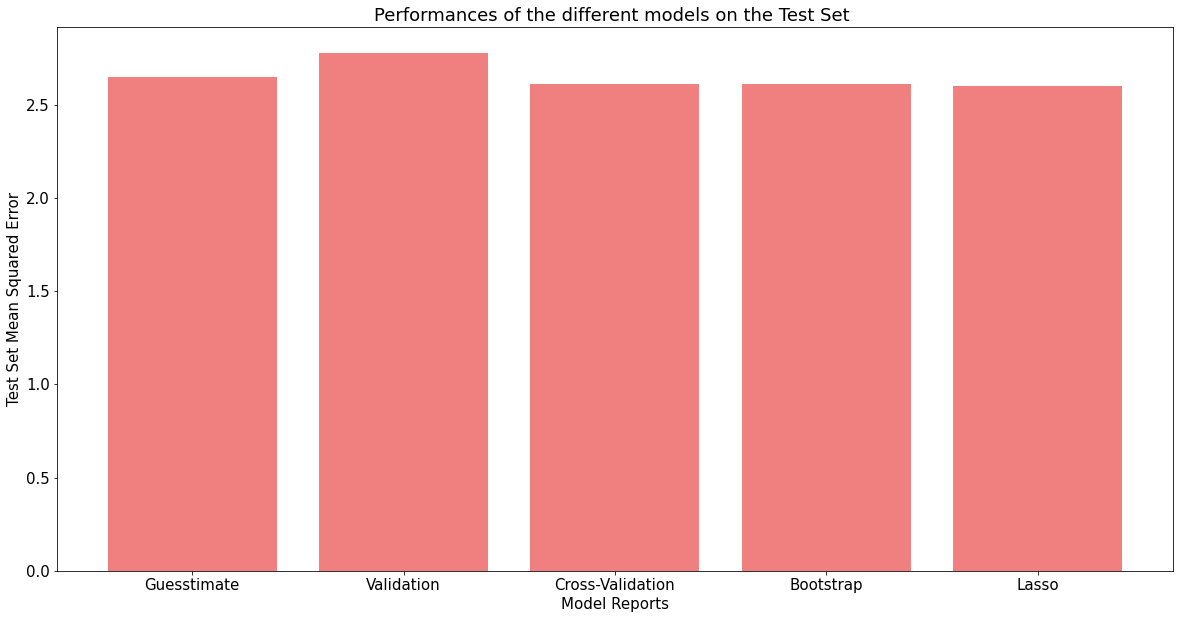

In [56]:
# your code here
plt.figure(figsize = (20, 10))
plt.ylabel('Test Set Mean Squared Error')
plt.xlabel('Model Reports')
plt.title('Performances of the different models on the Test Set ')
plt.bar(x = ['Guesstimate', 'Validation', 'Cross-Validation', 'Bootstrap', 'Lasso'], height = results_df.values[0], color='lightcoral')

**7.2** [6 pts] Which model do you think is best, and why? What are some of its drawbacks compared to the other methods you tested?

According to the previous plot, I think the best model would be Lasso Model. Indeed, I have advocated that I think we have built this model in the more robust way, using hyperparameter tuning via cross validation, leveraging bootstrap and model feature selection when cutting out the high degrees. Lasso also allows better model interpretability since it provides us with sparse solution. 

However, some drawbacks when using Lasso are that there is no closed-form solution, the algorithm is an iterative optimization algorithm that may be quite computationally demanding.

#### THE END